In [28]:
from mnist import MNIST
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

In [2]:
mndata = MNIST('data')

In [3]:
test_x, test_y = mndata.load_testing()

In [4]:
def normalize(data):
    return (np.array(data) - 128) / 128

In [5]:
test_x = normalize(test_x)

In [6]:
def change_to_2d(data):
    return data.reshape(data.shape[0], 28, 28, 1)

In [7]:
test_x = change_to_2d(test_x)

In [8]:
def add_padding(data):
    return np.array([np.pad(x, (1,1), 'constant', constant_values = -1) for x in data])

In [9]:
test_x = add_padding(test_x)

In [10]:
def one_hot_encode(data):
    a = np.array(data)
    b = np.zeros((a.size, a.max()+1))
    b[np.arange(a.size),a] = 1
    return b

In [11]:
test_y = one_hot_encode(test_y)

In [12]:
print(test_x.shape, test_y.shape)

(10000, 30, 30, 3) (10000, 10)


## Validate

In [16]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.plot(hist['epoch'], hist['acc'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_acc'],
           label = 'Val Error')
    m = max(max([history.history['acc'] + history.history['val_acc']]))
    plt.ylim([0,m * 1.1])
    plt.legend()

In [19]:
from itertools import product
models_list = list(product(['relu', 'elu'], [True, False], ['Adam', 'RMSprop']))[:7]

In [20]:
models_list

[('relu', True, 'Adam'),
 ('relu', True, 'RMSprop'),
 ('relu', False, 'Adam'),
 ('relu', False, 'RMSprop'),
 ('elu', True, 'Adam'),
 ('elu', True, 'RMSprop'),
 ('elu', False, 'Adam')]

In [ ]:
from tensorflow.contrib.layers import xavier_initializer

In [58]:
from tensorflow.keras.models import load_model
from tensorflow.keras.initializers import glorot_uniform

ImportError: No module named 'tensorflow.keras.model'

In [ ]:
# https://stackoverflow.com/questions/57493940/unknown-initializer-initializer-while-loading-tensorflow-model

In [61]:
model_container = []
history_container = []
for i in range(7):
    history_container.append(pd.read_csv('history_'+str(i)))
    model_container.append(load_model('model_'+str(i), custom_objects={'xavier_initializer': xavier_initializer}))

ValueError: Unknown initializer:_initializer

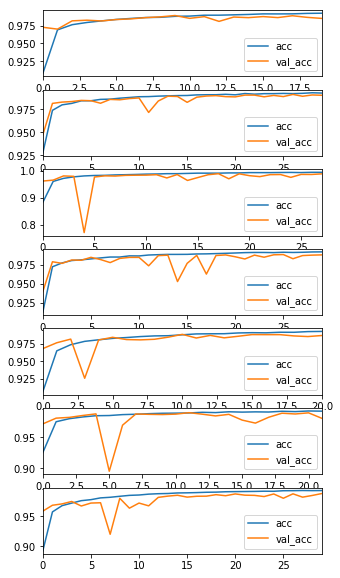

In [27]:
fig, axes = plt.subplots(7,1)
for i in range(7):
    history_container[i][['acc', 'val_acc']].plot(ax = axes[i], figsize = (5,10))